In [1]:
# Importing necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Loading loan dataset
# Converting column number 47 to str as it was throwing an error
loan = pd.read_csv('loan.csv',dtype={'next_pymnt_d':'str'})
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print('Shape of the Loan Dataset : ',loan.shape)

Shape of the Loan Dataset :  (39717, 111)


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Data Cleaning

In [6]:
# Getting number of unique values in each columns
unique = np.array(loan.nunique(axis=0))
print(unique)

[39717 39717   885  1041  8205     2   371 15383     7    35 28820    11
     5  5318     3    55     3     1 39717 26527    14 19615   823    50
  2868    11   526     9    95   111    40     5 21711  1089    82     1
  1137  1138 37850 37518  7976 35148  1356  4040  2616   101 34930     2
   106     1     0     1     1     0     0     0     1     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     3     1     0
     0     0     0]


In [7]:
# Selecting coulmns which have more than one unique value as column having one or no values are not needed for analysis
loan1 = loan.loc[:,unique>1]
loan1.shape

(39717, 48)

In [8]:
print(loan1.columns)
loan1.head()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [9]:
# we could see that id and member_id are unqiue
# and total number of rows in dataset is same as total number of row in id and member_id hence we can ignore it.
loan2 = loan1.drop(['id','member_id'],axis=1)

# Dropping below columns as it doesn't help in getting any usefull information related to loan repayements.
loan3 = loan2.drop(['url', 'desc', 'zip_code', 'emp_title','title'],axis=1)

# Dropping column 'funded_amnt' and 'funded_amnt_inv' as these two are highly related to column 'loan_amnt'
loan4 = loan3.drop(['funded_amnt','funded_amnt_inv'],axis=1)

# Droping below columns as below details will be generated after the approval of the loan hence below columns are not required
loan5 = loan4.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util'],axis=1)
loan6 = loan5.drop(['total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'],axis=1)
loan7 = loan6.drop(['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',],axis=1)
loanf = loan7.drop(['last_pymnt_amnt','last_credit_pull_d','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)

# Final Dataset
print(loanf.shape)
print(loanf.columns)
print(loanf.dtypes)
loanf.head()

(39717, 16)
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')
loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [10]:
# Removing '%' from column int_rate and converting dtype to float
loanf['int_rate'] = loanf['int_rate'].apply(lambda x: float(str(x).strip('%')))

In [11]:
# removing 'months' from coulmn term and converting it to int
loanf['term'] = loanf['term'].apply(lambda x: int(str(x).strip().split(' ')[0]))

In [12]:
# Converting data type of column issue_d from object to date
loanf['issue_d'] = pd.to_datetime(loanf['issue_d'], format='%b-%y')

In [13]:
# Checking types of value in loan_status
loanf['loan_status'].unique()

# We need to analyse the loans who are fully paid or defaulted(Charged off) hence removing rows of value current
loanf1 = loanf[loanf['loan_status'] != 'Current']

In [14]:
loanf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  int64         
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            37544 non-null  object        
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

In [15]:
# Univariate Analysis

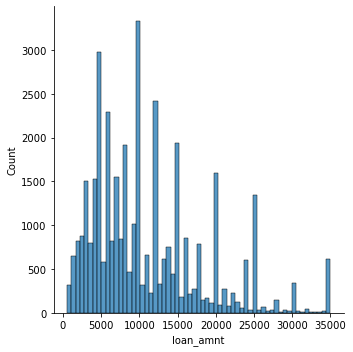

In [16]:
sns.displot(loanf1.loan_amnt)

# we could see that loan amount spikes around round figures (5000, 10000, 15000, 20000...). So we can assume people usually borrow money in rounded figures.

Text(0, 0.5, 'Loan Amount')

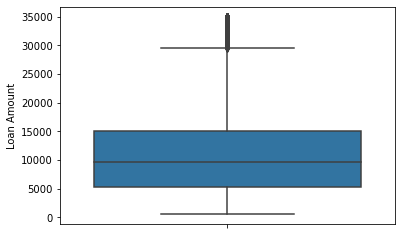

In [17]:
sns.boxplot(y=loanf1.loan_amnt)
plt.ylabel('Loan Amount')
# we can infer from below graph most of the people borrow money between 5000 to 15000.

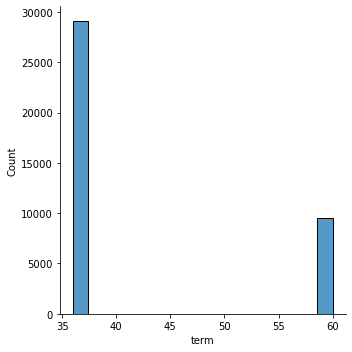

In [18]:
sns.displot(loanf1.term)

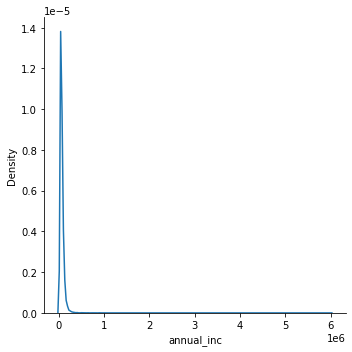

In [19]:
sns.displot(loanf1.annual_inc,kind='kde')
# Borrower prefer 36 month loan than 60 month loan

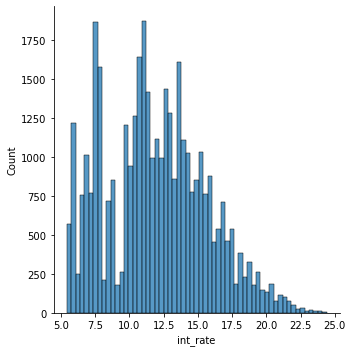

In [20]:
sns.displot(loanf1.int_rate)

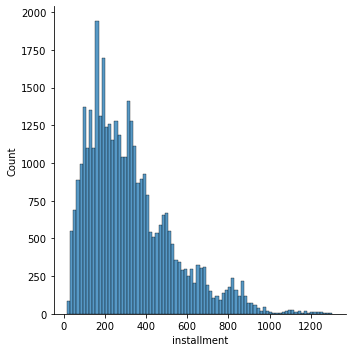

In [21]:
sns.displot(loanf1.installment)

<AxesSubplot:xlabel='grade', ylabel='count'>

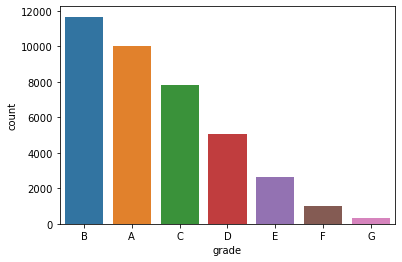

In [22]:
sns.countplot(x=loanf1["grade"],order=loanf['grade'].value_counts().index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '8 years'),
  Text(10, 0, '9 years')])

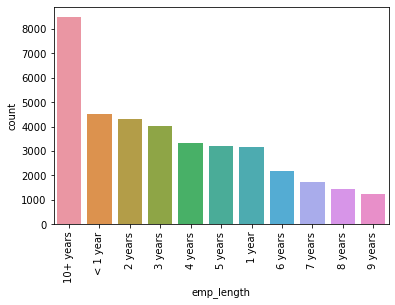

In [23]:
sns.countplot(x=loanf1.emp_length,order=loanf1.emp_length.value_counts().index)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

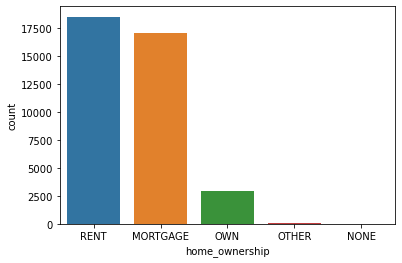

In [24]:
sns.countplot(x=loanf1["home_ownership"],order=loanf['home_ownership'].value_counts().index)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

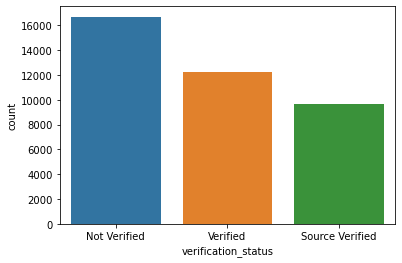

In [25]:
sns.countplot(x=loanf1["verification_status"],order=loanf['verification_status'].value_counts().index)

<AxesSubplot:xlabel='issue_d', ylabel='count'>

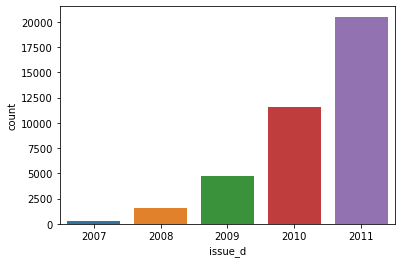

In [26]:
sns.countplot(x=loanf1["issue_d"].dt.year)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

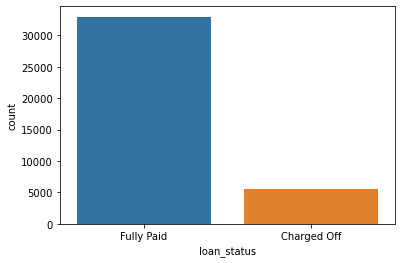

In [27]:
sns.countplot(x=loanf1["loan_status"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

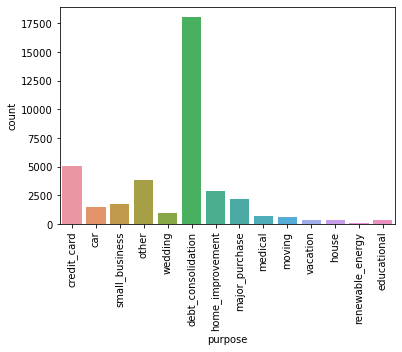

In [28]:
sns.countplot(x=loanf1["purpose"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'PA'),
  Text(7, 0, 'VA'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'MA'),
  Text(10, 0, 'OH'),
  Text(11, 0, 'MD'),
  Text(12, 0, 'AZ'),
  Text(13, 0, 'WA'),
  Text(14, 0, 'CO'),
  Text(15, 0, 'NC'),
  Text(16, 0, 'CT'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'MO'),
  Text(19, 0, 'MN'),
  Text(20, 0, 'NV'),
  Text(21, 0, 'SC'),
  Text(22, 0, 'WI'),
  Text(23, 0, 'AL'),
  Text(24, 0, 'OR'),
  Text(25, 0, 'LA'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'KS'),
  Text(29, 0, 'UT'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'DC'),
  Text(32, 0, 'RI'),
  Text(33, 0, 'NM'),
  Text(34, 0, 'WV'),
  Text(35, 0, 'NH'),
  Text(36, 0, 'HI'),
  Text(

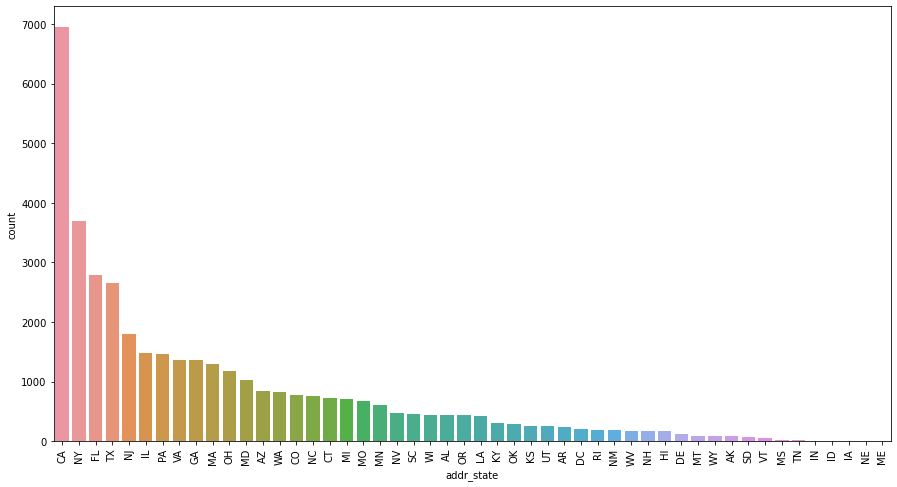

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x=loanf1["addr_state"],order=loanf1["addr_state"].value_counts().index)
plt.xticks(rotation=90)

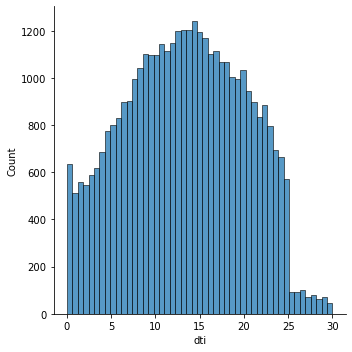

In [30]:
sns.displot(loanf1.dti)

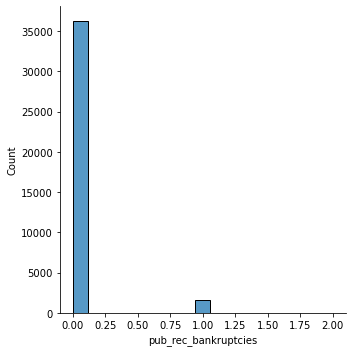

In [31]:
sns.displot(loanf1.pub_rec_bankruptcies)

In [32]:
# Bivariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

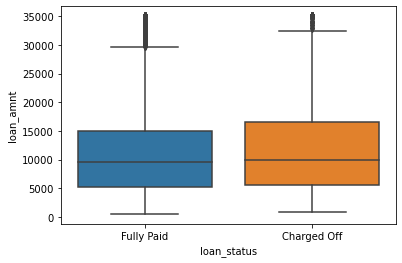

In [33]:
sns.boxplot(y=loanf1.loan_amnt,x=loanf1.loan_status)

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

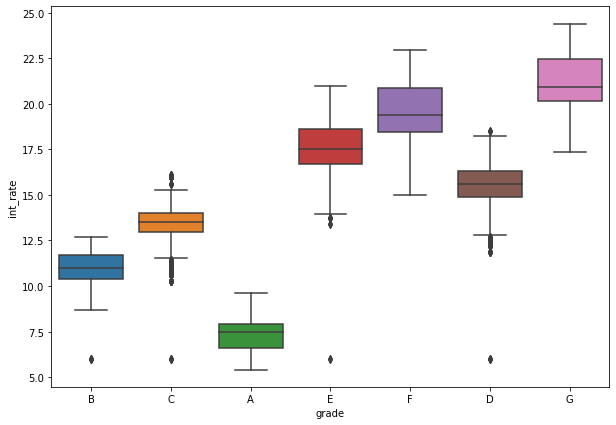

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.int_rate,x=loanf1.grade)

<AxesSubplot:xlabel='emp_length', ylabel='int_rate'>

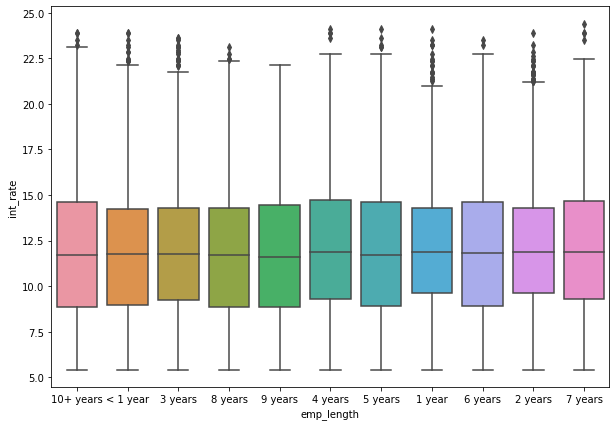

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.int_rate,x=loanf1.emp_length)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

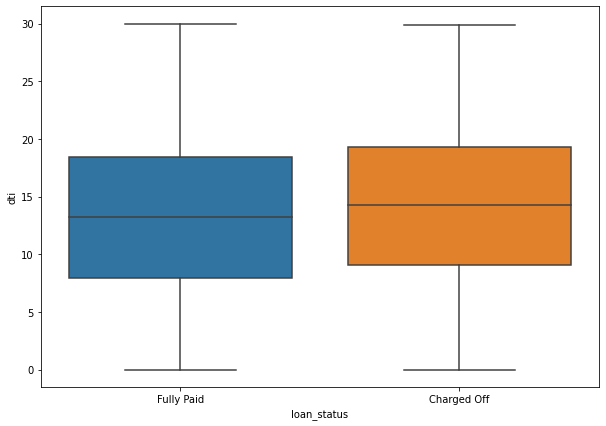

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.dti,x=loanf1.loan_status)

<AxesSubplot:xlabel='term', ylabel='int_rate'>

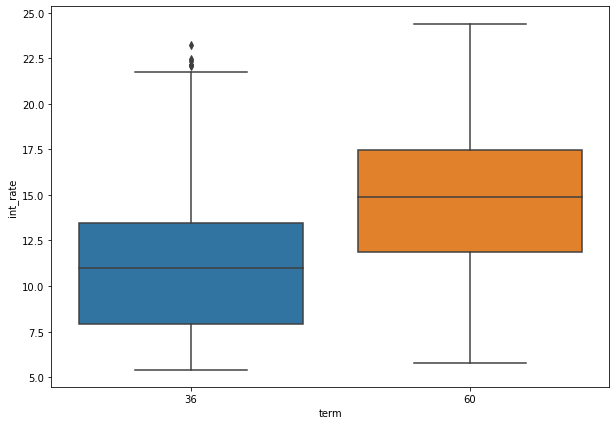

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.int_rate,x=loanf1.term)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

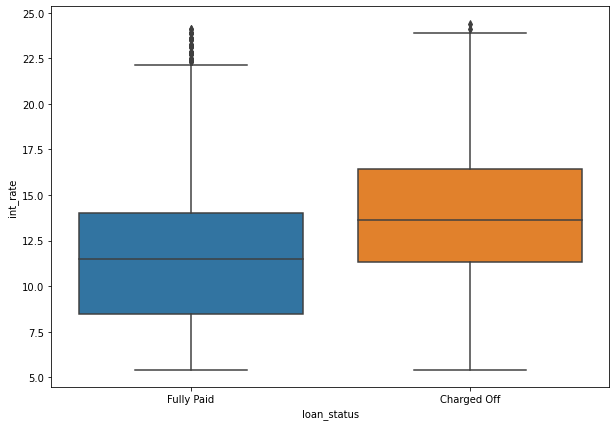

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.int_rate,x=loanf1.loan_status)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'car'),
  Text(7, 0, 'wedding'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

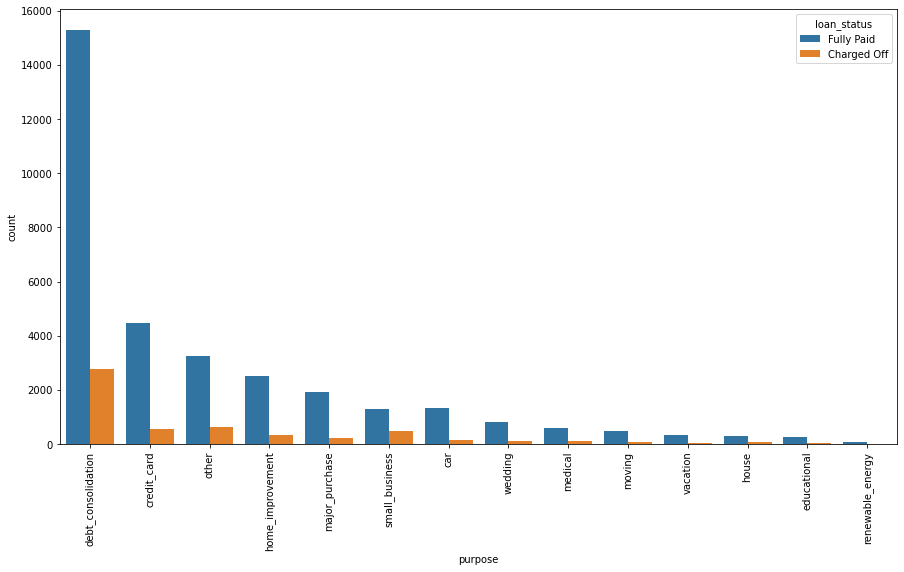

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(hue=loanf1.loan_status,x=loanf1["purpose"],order=loanf1["purpose"].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'PA'),
  Text(7, 0, 'VA'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'MA'),
  Text(10, 0, 'OH'),
  Text(11, 0, 'MD'),
  Text(12, 0, 'AZ'),
  Text(13, 0, 'WA'),
  Text(14, 0, 'CO'),
  Text(15, 0, 'NC'),
  Text(16, 0, 'CT'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'MO'),
  Text(19, 0, 'MN'),
  Text(20, 0, 'NV'),
  Text(21, 0, 'SC'),
  Text(22, 0, 'WI'),
  Text(23, 0, 'AL'),
  Text(24, 0, 'OR'),
  Text(25, 0, 'LA'),
  Text(26, 0, 'KY'),
  Text(27, 0, 'OK'),
  Text(28, 0, 'KS'),
  Text(29, 0, 'UT'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'DC'),
  Text(32, 0, 'RI'),
  Text(33, 0, 'NM'),
  Text(34, 0, 'WV'),
  Text(35, 0, 'NH'),
  Text(36, 0, 'HI'),
  Text(

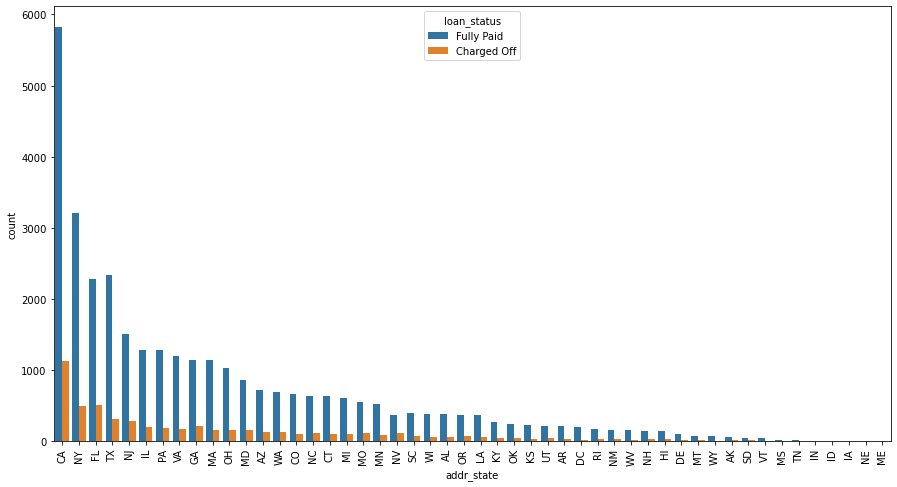

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(hue=loanf1.loan_status,x=loanf1["addr_state"],order=loanf1["addr_state"].value_counts().index)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='grade', ylabel='count'>

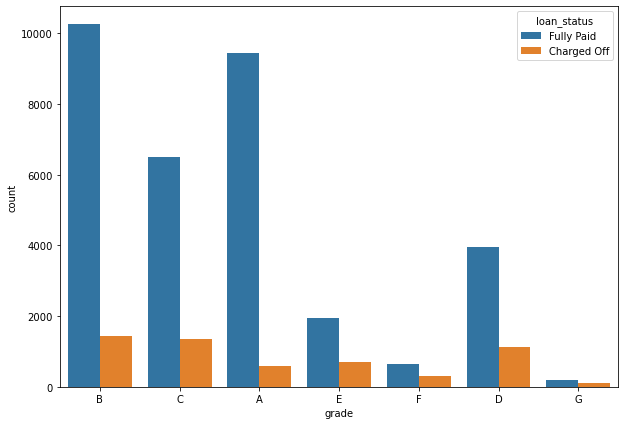

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.grade)

<AxesSubplot:xlabel='term', ylabel='count'>

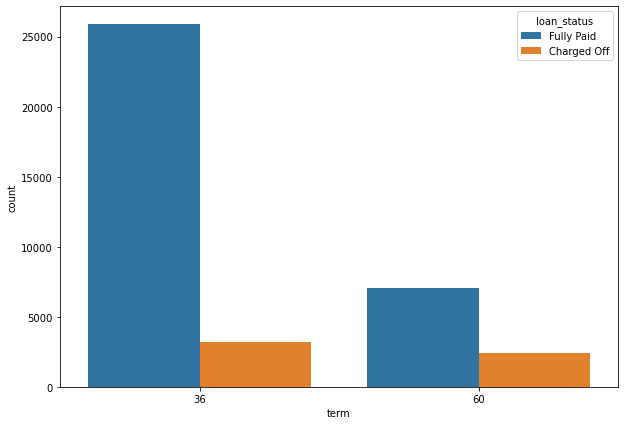

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.term)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

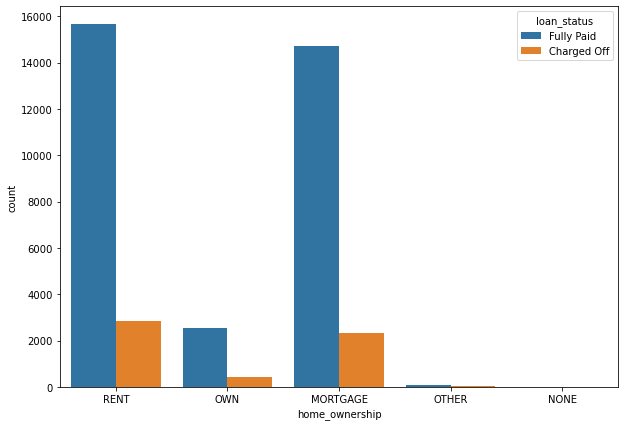

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.home_ownership)

<AxesSubplot:xlabel='issue_d', ylabel='count'>

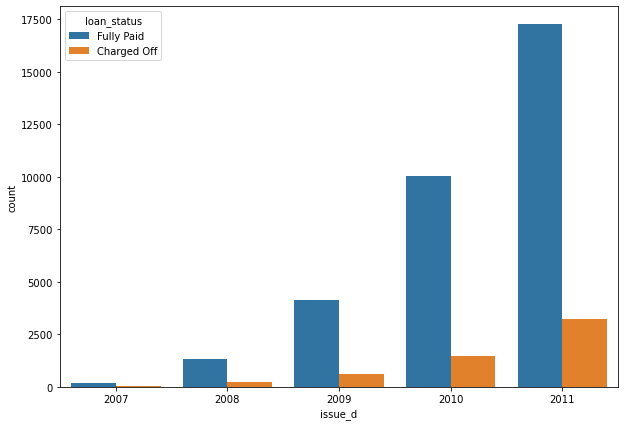

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.issue_d.dt.year)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

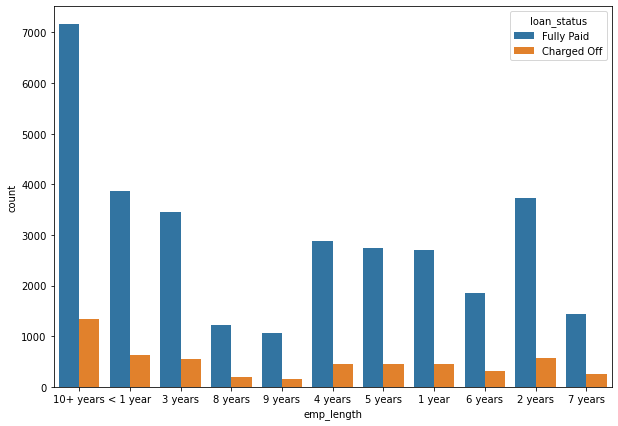

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.emp_length)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

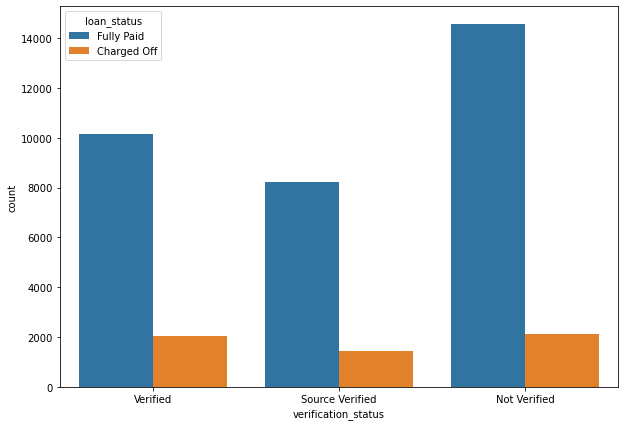

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(hue=loanf1.loan_status,x=loanf1.verification_status)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

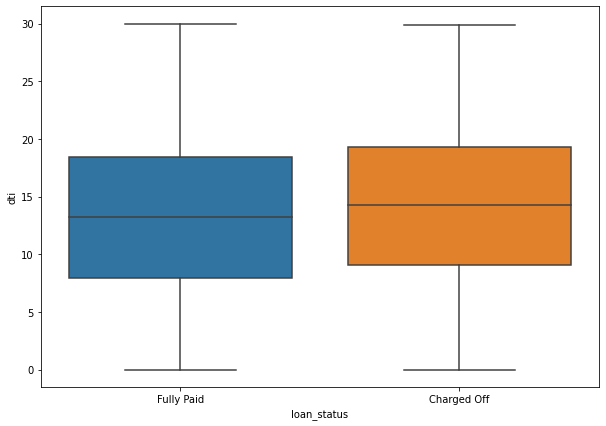

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(y=loanf1.dti,x=loanf1.loan_status)

In [46]:
# Multivariate analysis

<AxesSubplot:>

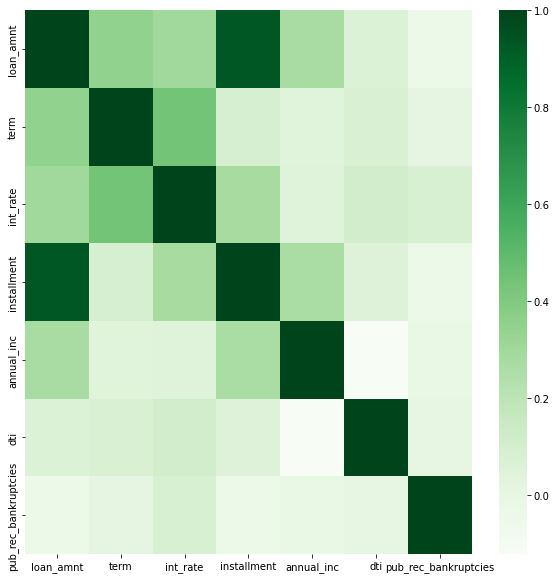

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(loanf1.corr(), cmap='Greens')